# PYTHON PROGRAMMING 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 기온데이터 분석

### 1907년부터 2018년3월까지의 서울 기온 데이터를 CSV로 다운로드 한다.

### - 다운로드 파일을 미리 제공해서 폴더에 넣어두었습니다. seoul.csv 파일을 열어 보세요. encoding='cp949'

In [4]:
df = pd.read_csv('data/seoul.csv' ,  encoding='cp949')

In [6]:
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


## 실습 1. 가장 더운날은 언제입니까?

In [14]:
df['최고기온(℃)'] == df['최고기온(℃)'].max()

0        False
1        False
2        False
3        False
4        False
         ...  
39921    False
39922    False
39923    False
39924    False
39925    False
Name: 최고기온(℃), Length: 39926, dtype: bool

In [16]:
df.loc[df['최고기온(℃)'] == df['최고기온(℃)'].max() ,  ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
31277,1994-07-24,108,33.1,28.1,38.4


In [48]:
df2 = df.set_index('날짜')

In [51]:
df2['최고기온(℃)']

날짜
1907-10-01    20.7
1907-10-02    22.0
1907-10-03    21.3
1907-10-04    22.0
1907-10-05    25.4
              ... 
2018-03-24    13.1
2018-03-25    16.9
2018-03-26    18.1
2018-03-27    20.0
2018-03-28    19.0
Name: 최고기온(℃), Length: 39926, dtype: float64

In [53]:
df2['최고기온(℃)'] == df2['최고기온(℃)'].max()

날짜
1907-10-01    False
1907-10-02    False
1907-10-03    False
1907-10-04    False
1907-10-05    False
              ...  
2018-03-24    False
2018-03-25    False
2018-03-26    False
2018-03-27    False
2018-03-28    False
Name: 최고기온(℃), Length: 39926, dtype: bool

In [55]:
df2.loc[ df2['최고기온(℃)'] == df2['최고기온(℃)'].max() , ]

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1994-07-24,108,33.1,28.1,38.4


## 실습 2. 최고기온을 히스토그램으로 나타내되, bin의 범위를 4도로 만들어서, 히스토그램으로 보여주세요.

In [56]:
df['최고기온(℃)'].describe()

count    39168.000000
mean        16.684921
std         10.996621
min        -16.300000
25%          7.100000
50%         18.500000
75%         26.200000
max         38.400000
Name: 최고기온(℃), dtype: float64

In [94]:
my_bins1 = np.arange( -16.3 , 38.4+4 , 4 )

In [95]:
my_bins1

array([-16.3, -12.3,  -8.3,  -4.3,  -0.3,   3.7,   7.7,  11.7,  15.7,
        19.7,  23.7,  27.7,  31.7,  35.7,  39.7])

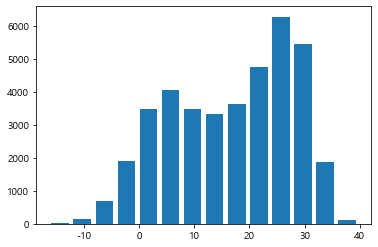

In [60]:
plt.hist(data= df, x = '최고기온(℃)' , rwidth= 0.8 , bins = my_bins)
plt.show()

In [17]:
df['최고기온(℃)']

0        20.7
1        22.0
2        21.3
3        22.0
4        25.4
         ... 
39921    13.1
39922    16.9
39923    18.1
39924    20.0
39925    19.0
Name: 최고기온(℃), Length: 39926, dtype: float64

In [29]:
(df['최고기온(℃)'].max() - df['최고기온(℃)'].min()) / 4

13.675

In [26]:
df['최고기온(℃)'].min()

-16.3

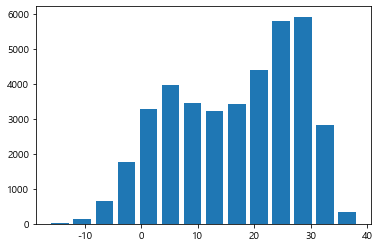

In [32]:
plt.hist(data= df, x = '최고기온(℃)' , rwidth= 0.8 , bins = 14)
plt.show()

## 실습 3. 위에서는 모든 날짜에 대한 데이터 입니다.  그러면! 2014년도 부터의 데이터를 기준으로, bin의 범위를 4도로 만들어서, 히스토그램으로 보여주세요.

In [33]:
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


In [38]:
df['날짜'].str.contains('2014')

0        False
1        False
2        False
3        False
4        False
         ...  
39921    False
39922    False
39923    False
39924    False
39925    False
Name: 날짜, Length: 39926, dtype: bool

In [64]:
df.loc[ df['날짜'].str.contains('2014') , ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
38378,2014-01-01,108,4.0,0.3,7.9
38379,2014-01-02,108,1.5,-1.3,6.2
38380,2014-01-03,108,2.3,-1.1,7.3
38381,2014-01-04,108,-0.1,-3.7,5.6
38382,2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...,...
38738,2014-12-27,108,-1.8,-6.3,5.0
38739,2014-12-28,108,-0.8,-3.6,1.6
38740,2014-12-29,108,2.9,-0.5,6.4
38741,2014-12-30,108,1.9,-1.6,6.3


In [71]:
df.iloc[ 38378 : , ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
38378,2014-01-01,108,4.0,0.3,7.9
38379,2014-01-02,108,1.5,-1.3,6.2
38380,2014-01-03,108,2.3,-1.1,7.3
38381,2014-01-04,108,-0.1,-3.7,5.6
38382,2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


In [72]:
df.loc[ 38378 : , ]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
38378,2014-01-01,108,4.0,0.3,7.9
38379,2014-01-02,108,1.5,-1.3,6.2
38380,2014-01-03,108,2.3,-1.1,7.3
38381,2014-01-04,108,-0.1,-3.7,5.6
38382,2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


In [73]:
df_2014 = df.loc[ 38378 : , ]

In [74]:
df_2014

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
38378,2014-01-01,108,4.0,0.3,7.9
38379,2014-01-02,108,1.5,-1.3,6.2
38380,2014-01-03,108,2.3,-1.1,7.3
38381,2014-01-04,108,-0.1,-3.7,5.6
38382,2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


In [75]:
df

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
39921,2018-03-24,108,7.6,4.0,13.1
39922,2018-03-25,108,9.6,4.6,16.9
39923,2018-03-26,108,11.0,5.3,18.1
39924,2018-03-27,108,13.3,7.7,20.0


In [77]:
df2 = df.set_index('날짜')

In [78]:
df2

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
1907-10-01,108,13.5,7.9,20.7
1907-10-02,108,16.2,7.9,22.0
1907-10-03,108,16.2,13.1,21.3
1907-10-04,108,16.5,11.2,22.0
1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...
2018-03-24,108,7.6,4.0,13.1
2018-03-25,108,9.6,4.6,16.9
2018-03-26,108,11.0,5.3,18.1


In [84]:
df_2014 = df2.loc[ '2014' : , ]

In [85]:
df_2014

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2014-01-01,108,4.0,0.3,7.9
2014-01-02,108,1.5,-1.3,6.2
2014-01-03,108,2.3,-1.1,7.3
2014-01-04,108,-0.1,-3.7,5.6
2014-01-05,108,-0.8,-4.3,3.8
...,...,...,...,...
2018-03-24,108,7.6,4.0,13.1
2018-03-25,108,9.6,4.6,16.9
2018-03-26,108,11.0,5.3,18.1


In [86]:
df_2014['최고기온(℃)'].describe()

count    1547.000000
mean       17.695604
std        11.072697
min       -10.700000
25%         7.450000
50%        19.500000
75%        27.800000
max        36.600000
Name: 최고기온(℃), dtype: float64

In [91]:
my_bins2 = np.arange(-10.7, 36.6 +4 , 4)

In [88]:
my_bins

array([-10.7,  -6.7,  -2.7,   1.3,   5.3,   9.3,  13.3,  17.3,  21.3,
        25.3,  29.3,  33.3,  37.3])

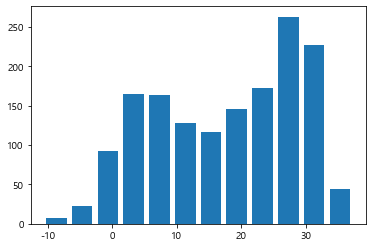

In [92]:
plt.hist(data = df_2014 , x= '최고기온(℃)', rwidth=0.8, bins = my_bins2)
plt.show()

In [ ]:
plt.figure( figsize= (4, 3) )

plt.subplot(1, 2, 1)

In [97]:
plt.figure(figsize=(15.6))

plt.subplot(1, 2, 1)
my_bins1 = np.arange( -16.3, 38.4 +4 , 4 )
plt.hist(data = df , x= '최고기온(℃)', rwidth=0.8, bins = my_bins1)

plt.subplot(1, 2, 2)
my_bins2 = np.arange(-10.7, 36.6 +4 , 4)
plt.hist(data = df_2014 , x= '최고기온(℃)', rwidth=0.8, bins = my_bins2)

plt.show()

TypeError: Value after * must be an iterable, not float

## 실습 4.  2017-08-01 ~ 2017-08-15 사이의 날짜별 x축,  최고기온을 y축으로 스케터로 나타내세요.

In [99]:
df3 = df2.loc[ '2017-08-01' : '2017-08-15' , ]

In [100]:
df3

,지점,평균기온(℃),최저기온(℃),최고기온(℃)
날짜,,,,
2017-08-01,108,28.6,24.1,33.0
2017-08-02,108,30.0,26.6,33.0
2017-08-03,108,30.2,27.2,33.9
2017-08-04,108,30.3,25.9,35.3
2017-08-05,108,31.4,27.6,34.8
2017-08-06,108,29.8,28.2,34.0
2017-08-07,108,29.2,26.4,34.4
2017-08-08,108,28.2,25.5,31.0
2017-08-09,108,27.6,24.6,32.0


In [103]:
df4 = df3.reset_index()

In [104]:
df4

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,2017-08-01,108,28.6,24.1,33.0
1,2017-08-02,108,30.0,26.6,33.0
2,2017-08-03,108,30.2,27.2,33.9
3,2017-08-04,108,30.3,25.9,35.3
4,2017-08-05,108,31.4,27.6,34.8
5,2017-08-06,108,29.8,28.2,34.0
6,2017-08-07,108,29.2,26.4,34.4
7,2017-08-08,108,28.2,25.5,31.0
8,2017-08-09,108,27.6,24.6,32.0
9,2017-08-10,108,24.8,23.9,26.3


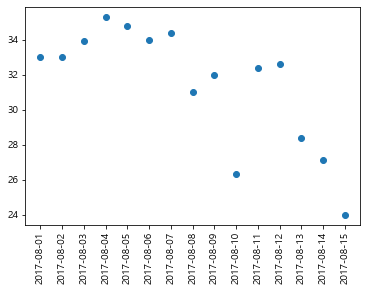

In [107]:
plt.scatter(data= df4, x='날짜', y='최고기온(℃)')
# 날짜는 인덱스인데 컬럼만 써야됨
# 인덱스는 데이터가 아님
plt.xticks(rotation = 90)
plt.show()